## KS200 자료 2013년도 부터~

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 12 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

## 코스피200 지수 2013년도 부터~

<AxesSubplot:xlabel='Date'>

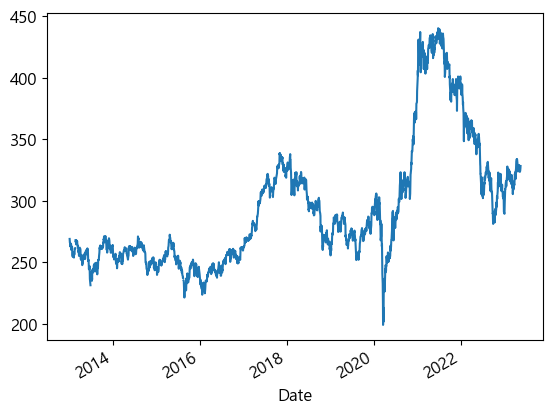

In [2]:
KS200_df = fdr.DataReader('KS200', '2013')
KS200_df['Close'].plot()

In [3]:
KS200_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,266.239990,269.510010,266.100006,269.160004,269.160004,91400.0
2013-01-03,270.540009,270.739990,267.450012,267.519989,267.519989,150000.0
2013-01-04,267.230011,267.459991,264.739990,266.140015,266.140015,103700.0
2013-01-07,266.119995,266.429993,263.869995,265.970001,265.970001,76600.0
2013-01-08,264.809998,265.869995,263.950012,263.950012,263.950012,81400.0


In [4]:
KS200_df['Close'].head()

Date
2013-01-02    269.160004
2013-01-03    267.519989
2013-01-04    266.140015
2013-01-07    265.970001
2013-01-08    263.950012
Name: Close, dtype: float64

In [5]:
len(KS200_df['Close'])

2552

In [6]:
type(KS200_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

## 환율 2013 년도 부터~

<AxesSubplot:xlabel='Date'>

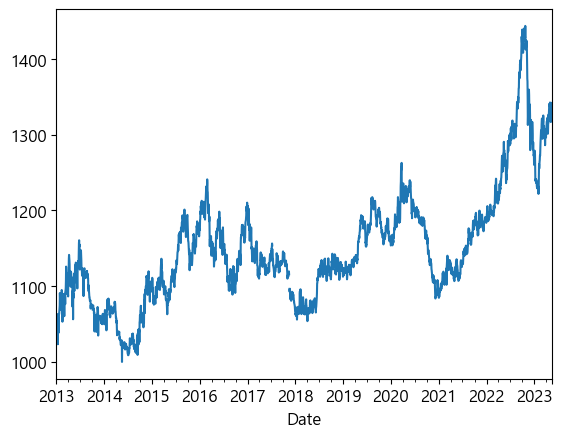

In [7]:
UK_df = fdr.DataReader('USD/KRW', '2013')
UK_df['Close'].plot()

In [8]:
UK_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,1062.500000,1064.500000,1061.640015,1062.500000,1062.500000,0.0
2013-01-02,1062.599976,1064.800049,1061.500000,1062.500000,1062.500000,0.0
2013-01-03,1062.400024,1063.800049,1059.199951,1062.599976,1062.599976,0.0
2013-01-04,1062.000000,1064.199951,1060.750000,1061.900024,1061.900024,0.0
2013-01-07,1055.000000,1063.900024,1033.000000,1033.099976,1033.099976,0.0


In [9]:
UK_df['Close'].head()

Date
2013-01-01    1062.500000
2013-01-02    1062.500000
2013-01-03    1062.599976
2013-01-04    1061.900024
2013-01-07    1033.099976
Name: Close, dtype: float64

In [10]:
len(UK_df['Close'])

2708

In [11]:
type(UK_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

## 유가(두바이유)

#### 유가 불러오는 함수(유가 엑셀 먼저 만든 후 당일 날짜로 불러오는게 가장 좋음)

In [12]:
def read_OIL(date):
    file_name = 'oil_price_{}.xlsx'.format(date)
    OIL_df = pd.read_excel(file_name)
    return OIL_df

In [13]:
OIL_df = read_OIL("20230517")

In [14]:
len(OIL_df['코드'])

4245

## 컬럼 명 변경 , 인덱스를 날짜로

In [15]:
OIL_df = OIL_df[['날짜','코드','종가']]
OIL_df.rename(columns={'날짜': 'Date'}, inplace=True)
OIL_df.rename(columns={'종가': 'Close'}, inplace=True)
OIL_df.rename(columns={'코드': 'Code'}, inplace=True)
OIL_df.set_index('Date', inplace=True)
OIL_df.sort_index(ascending=True, inplace=True)
OIL_df.head()

,Code,Close
Date,,
2006-04-18,OIL_DU,65.95
2006-04-19,OIL_DU,65.10
2006-04-20,OIL_DU,64.40
2006-04-21,OIL_DU,63.70
2006-04-24,OIL_DU,64.01


## 2013-01-01 부터 데이터 가져오기

In [16]:
OIL_df = OIL_df.loc['2013-01-01':]
OIL_df.head()

,Code,Close
Date,,
2013-01-02,OIL_DU,107.81
2013-01-03,OIL_DU,107.60
2013-01-04,OIL_DU,106.95
2013-01-07,OIL_DU,107.12
2013-01-08,OIL_DU,107.58


In [17]:
type(OIL_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

<AxesSubplot:xlabel='Date'>

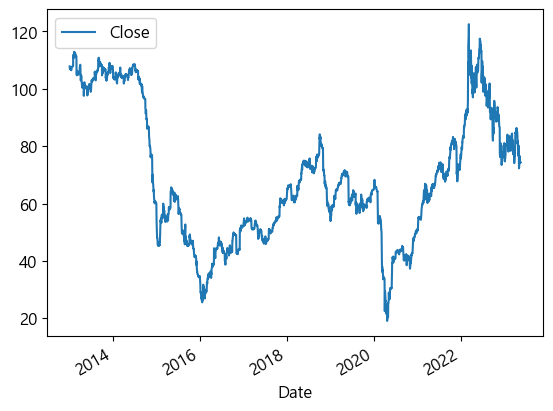

In [18]:
OIL_df.plot()

## 인덱스(날짜) 맞추기 위한 작업

In [19]:
# UK_df = 2704 , OIL_df = 2608, KS200_df = 2548

In [20]:
OIL_df = OIL_df.reindex(UK_df.index).fillna(method='ffill')
KS200_df = KS200_df.reindex(UK_df.index).fillna(method='ffill')

In [21]:
UK_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,1062.500000,1064.500000,1061.640015,1062.500000,1062.500000,0.0
2013-01-02,1062.599976,1064.800049,1061.500000,1062.500000,1062.500000,0.0
2013-01-03,1062.400024,1063.800049,1059.199951,1062.599976,1062.599976,0.0
2013-01-04,1062.000000,1064.199951,1060.750000,1061.900024,1061.900024,0.0
2013-01-07,1055.000000,1063.900024,1033.000000,1033.099976,1033.099976,0.0


In [22]:
len(UK_df), len(OIL_df), len(KS200_df)

(2708, 2708, 2708)

## 종가(Close) 데이터 중 NaN 값을 그 다음 날짜 값으로 채워넣기

In [23]:
OIL_df['Close'] = OIL_df['Close'].fillna(method='bfill')
OIL_df['Code'] = OIL_df['Code'].fillna(method='bfill')

In [24]:
KS200_df['Close'] = KS200_df['Close'].fillna(method='bfill')

In [25]:
UK_df['Close'] = UK_df['Close'].fillna(method='bfill')

## 상관관계 분석

### 분석방법

#### KS200 과 UK

In [26]:
import scipy.stats
scipy.stats.pearsonr(KS200_df['Close'], UK_df['Close'])

PearsonRResult(statistic=0.15587998065872483, pvalue=3.4084070572413103e-16)

#### KS200 과 OIL

In [27]:
scipy.stats.pearsonr(KS200_df['Close'], OIL_df['Close'])

PearsonRResult(statistic=0.09130373077892473, pvalue=1.945028048972272e-06)

#### OIL 과 UK

In [28]:
scipy.stats.pearsonr(OIL_df['Close'], UK_df['Close'])

PearsonRResult(statistic=-0.10053884955620054, pvalue=1.5819369727035045e-07)

p값은 모집단에서 상관계수가 0일 때, 현재와 같은 크기의 표본에서 관찰된 상관계수보다 더 극단적인 상관계수가 관찰될 확률

보통 0.05(5%)와 같은 임계치를 정하고, p값이 그보다 작을 경우 "통계적으로 유의미하다"라고 함.

## Total 파일 하나 만들기 위하여 컬럼 명 알아보기 쉽게 변경하기

In [29]:
# OIL_df.rename(columns={'Close': 'Close_OIL'}, inplace=True)
# UK_df.rename(columns={'Close': 'Close_UK'}, inplace=True)
# KS200_df.rename(columns={'Close': 'Close_KS200'}, inplace=True)

In [30]:
# Total_df = pd.merge(OIL_df['Close_OIL'], UK_df['Close_UK'], on='Date')
# Total_df = pd.merge(Total_df, KS200_df['Close_KS200'], on='Date')
# Total_df.head()

In [31]:
OIL_df['Close']

Date
2013-01-01    107.81
2013-01-02    107.81
2013-01-03    107.60
2013-01-04    106.95
2013-01-07    107.12
               ...  
2023-05-12     74.01
2023-05-15     74.54
2023-05-16     74.42
2023-05-17     74.42
2023-05-18     74.42
Name: Close, Length: 2708, dtype: float64

In [32]:
UK_df['Close']

Date
2013-01-01    1062.500000
2013-01-02    1062.500000
2013-01-03    1062.599976
2013-01-04    1061.900024
2013-01-07    1033.099976
                 ...     
2023-05-12    1329.880005
2023-05-15    1341.520020
2023-05-16    1335.400024
2023-05-17    1342.430054
2023-05-18    1330.060059
Name: Close, Length: 2708, dtype: float64

In [33]:
OIL_df.loc['2023-01-01':].head()

,Code,Close
Date,,
2023-01-02,OIL_DU,81.06
2023-01-03,OIL_DU,77.91
2023-01-04,OIL_DU,74.69
2023-01-05,OIL_DU,75.46
2023-01-06,OIL_DU,75.40


## 날짜 별로 가져온 뒤 데이터 csv 파일 형태로 저장하는 함수

In [34]:
def get_Data_SaveCsv(df, date, filename): # date ex)'2023-01-01' filename ex) 'OIL'
    df = df.loc[date:]
    return df.to_csv('{}.csv'.format(filename), index=True)

# df 는 table, ex) OIL_df, KS200_df ..등등
# date 에는 언제부터 ~ 오늘까지 가져오는 날짜임(시작날짜)
# filename 은 내가 저장할 파일 이름 적어주면 됨